# **Hacktiv8 Introduction to Python for Data Science - Project Assignment 3 - Bank Marketing Data Set**

Nama : Andrena Dhiffa Salsabila

Kode Peserta : PYTN-KS20-02

Kelas : PYTN-KS-20

## **Project Overview**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

- bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
- Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

<p> 
    Link Dataset : <a href=https://archive.ics.uci.edu/dataset/222/bank+marketing>Bank Marketing Data Set</a>

## **Libraries**

In [157]:
import numpy as np
import sympy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from joblib import dump

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

## **Import Data**

Import dataset ke variabel data.

In [158]:
data =  pd.read_csv("bank-additional-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Membuat salinan agar data tidak rusak yang didefinisikan sebagai df.

In [159]:
df = data.copy()

## **Data Pre-processing**

Mencari info mengenai data.

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Mengganti semua _unkwown_ dengan _NaN_ serta menghapus seluruh _NaN_.

In [161]:
data.replace("unknown",np.nan,inplace=True)
data.dropna(inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Memperlihatkan informasi baru mengenai dataset.

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

## **Visualization**

Untuk mencari nilai korelasi antara variabel numerik dan kategorik pada setiap variabel

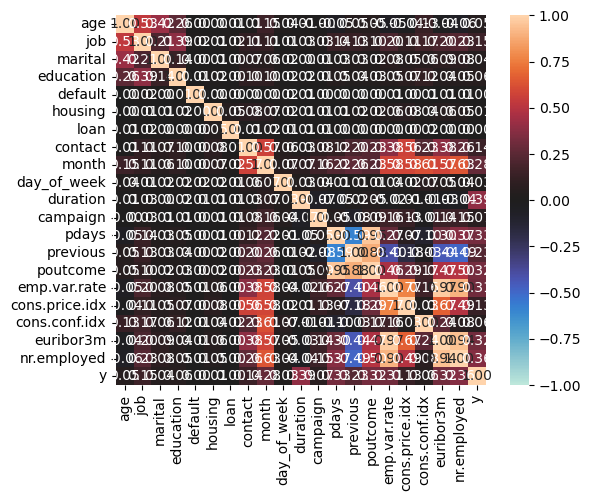

In [163]:
correlation = associations(data)     

Untuk melihat korelasi antara fitur dan target, maka yang digunakan hanya kolom y.

In [164]:
data_corr = correlation["corr"].iloc[:-1][["y"]].sort_values(by="y",ascending=False)
data_corr.style.background_gradient(cmap="RdYlGn",axis=None)


,y
duration,0.393530
nr.employed,0.364230
pdays,0.327509
poutcome,0.322919
euribor3m,0.315869
emp.var.rate,0.305365
month,0.277624
previous,0.228003
job,0.153701
contact,0.143642


Menurut beberapa sumber, apabila nilai koefisien korelasi kurang dari atau sama dengan 0,2 dianggap sangat lemah, sehingga disarankan untuk menghilangkan variabel yang nilai korelasinya sangat lemah.

In [165]:
color = []
for _ in data_corr.y:
    if _ >= 0.2:
        color.append("blue")
    else:
        color.append("lightblue")

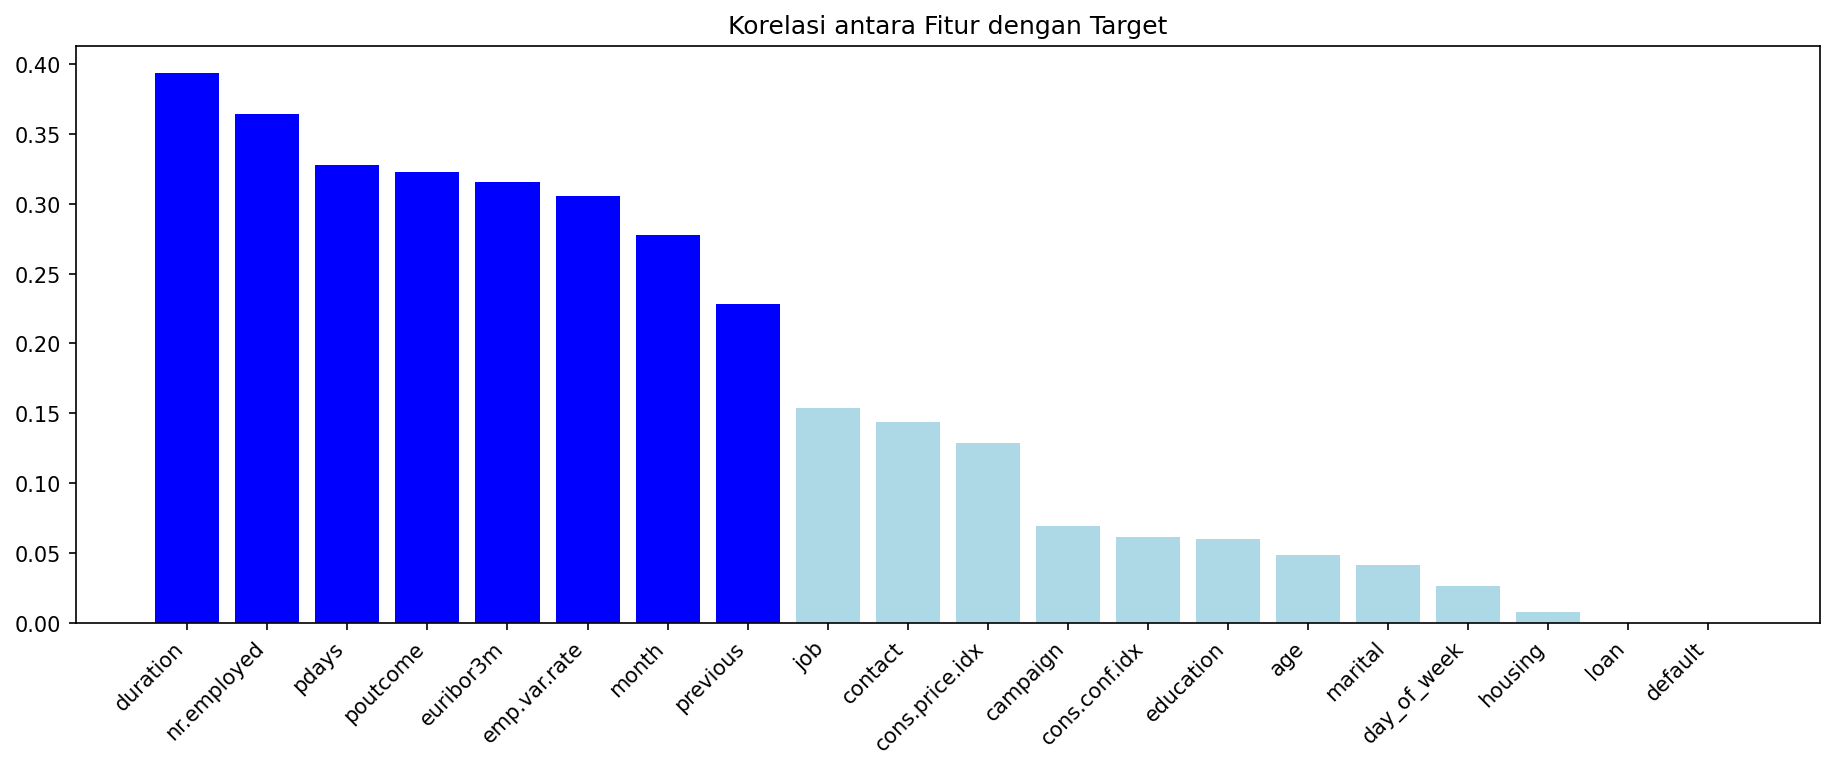

In [166]:
plt.figure(figsize=(15,5),dpi=150)
plt.bar(data_corr.index,data_corr.y,color=color)
plt.title("Korelasi antara Fitur dengan Target")
plt.xticks(rotation=45,ha="right")
plt.ylabel("")
plt.show()


Berdasarkan output di atas, didapati 12 data memiliki nilai korelasi yang sangat lemah sehingga harus dihilangkan.

In [167]:
data = data.drop(data[(data_corr[data_corr["y"] < 0.2].index).tolist()],axis=1)
data.head()

,month,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,may,261,999,0,nonexistent,1.1,4.857,5191.0,no
2,may,226,999,0,nonexistent,1.1,4.857,5191.0,no
3,may,151,999,0,nonexistent,1.1,4.857,5191.0,no
4,may,307,999,0,nonexistent,1.1,4.857,5191.0,no
6,may,139,999,0,nonexistent,1.1,4.857,5191.0,no


Membuat variabel dependen (fitur) dan variabel independen (target)

In [168]:
le = LabelEncoder()
X = data.drop("y",axis=1).copy().apply(le.fit_transform)
y = data["y"].copy()

Memisahkan data menjadi 2 bagian, yaitu training dan testing

In [169]:
random_state = 50
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

print(f"Training dataset\t: {len(X_train)}\t({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)}\t({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 24390	(80%)
Testing dataset		: 6098	(20%)


Standarisasi seluruh variabel X

In [170]:
standard = StandardScaler()
scaled_X_train = standard.fit_transform(X_train)
scaled_X_test = standard.transform(X_test)

## **Logistic Regression**

Membuat model regresi logistik

In [171]:
reglog_model = LogisticRegression(class_weight="balanced", random_state=8)
reglog_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=8)

Prediksi testing test menggunakan model regresi logistik

In [172]:
reglog_prediction = reglog_model.predict(scaled_X_test)

Hasil prediksi dari model regresi logistik

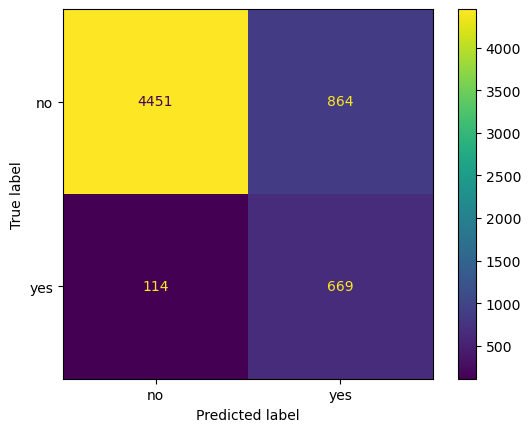

Accuracy = 83.962%


In [173]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,reglog_prediction,ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, reglog_prediction)*100,3)) + "%")

Melatih ulang seluruh dataset untuk membuat model regresi logistik final

In [174]:
final_log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)
final_log_model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Menampilkan koefisien beta pada model regresi logistik

In [175]:
pd.DataFrame(
    data=[final_log_model.intercept_[0]] + list(final_log_model.coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(X.columns)
)

,Unstandardized Coefficients
Constant,0.387557
month,-0.120378
duration,0.006574
pdays,0.006875
previous,0.367676
poutcome,1.063308
emp.var.rate,-0.226123
euribor3m,-0.002083
nr.employed,-0.275524


## **K-Nearest Neighbors**

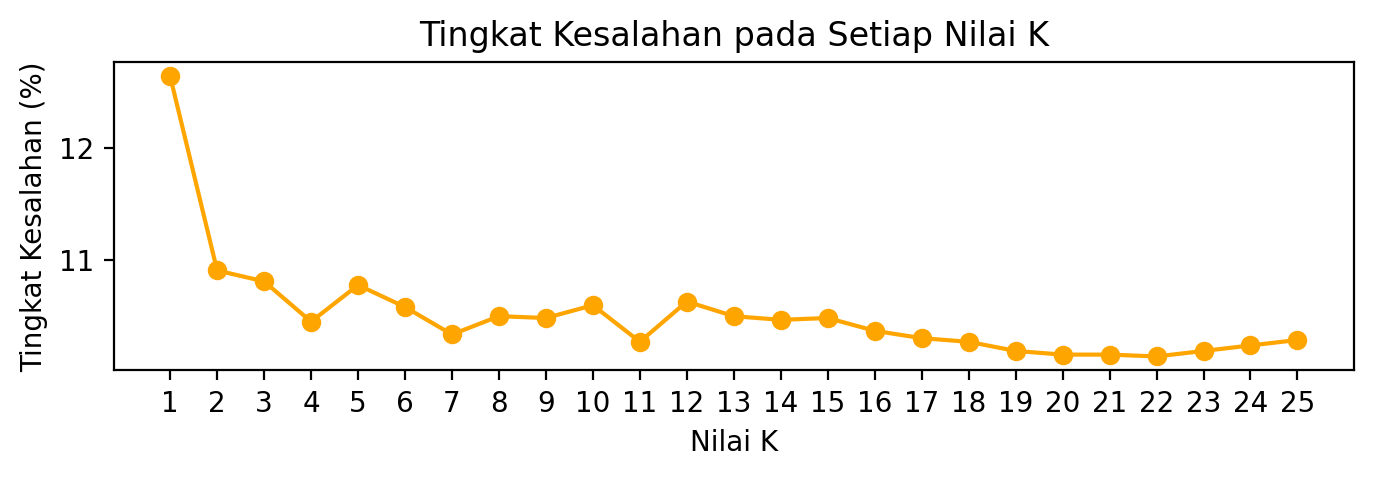

In [176]:
errors = []
for i in range(1,26):
    temp_model = KNeighborsClassifier(n_neighbors=i)
    temp_model.fit(scaled_X_train,y_train)
    temp_pred = temp_model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,temp_pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="orange",marker="o")
plt.title("Tingkat Kesalahan pada Setiap Nilai K")
plt.xlabel("Nilai K")
plt.xticks(range(1,26))
plt.ylabel("Tingkat Kesalahan (%)")
plt.show()

Membuat dan melatih model K-Nearest Neighbors dengan k=5

In [177]:
knearest_model = KNeighborsClassifier(n_neighbors=5,weights="distance")
knearest_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(weights='distance')

Memprediksi model K-Nearest Neighbors

In [178]:
knearest_prediction = knearest_model.predict(scaled_X_test)

Evaluasi hasil dari model K-Nearest Neighbors

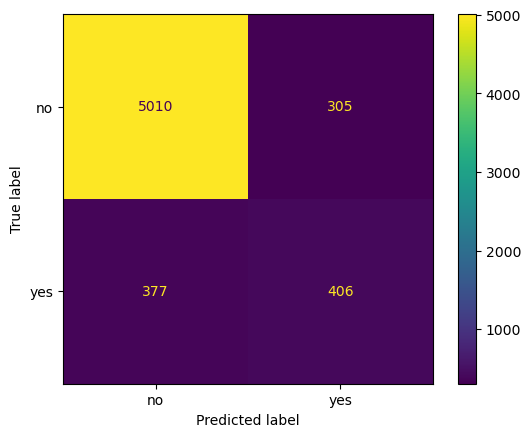

Accuracy = 88.816%


In [179]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test, knearest_prediction, ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, knearest_prediction)*100,3)) + "%")

Membuat final model K-Nearest Neighbors menggunakan seluruh dataset

In [180]:
final_knn_model = KNeighborsClassifier(n_neighbors=5,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(weights='distance')

## **Support Vector Machine**

Membuat dan coba gunakan model support vector machine

In [181]:
svm_model = SVC(class_weight="balanced",random_state=8)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=8)

Untuk memprediksi data testing gunakan support vector machine

In [182]:
svm_prediction = svm_model.predict(scaled_X_test)

Evaluasi dari model support vector machine

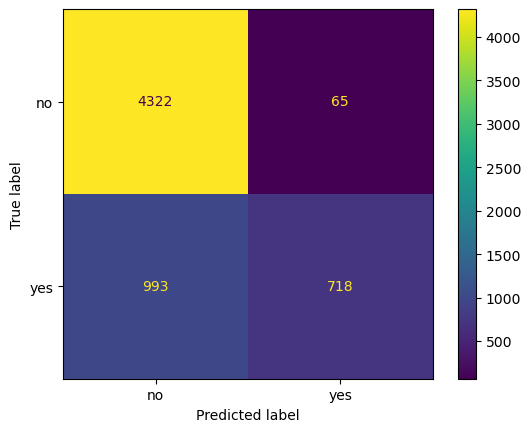

Accuracy = 82.65%


In [183]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(svm_prediction, y_test, ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, svm_prediction)*100,3)) + "%")

Membuat final model Support Vector Machine menggunakan seluruh dataset

In [184]:
final_svm_model = SVC(class_weight="balanced",random_state=42)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=42)

## **Decision Tree**

Membuat dan coba gunakan model decision tree

In [185]:
decision_model = DecisionTreeClassifier(max_depth=6,class_weight="balanced",random_state=8)
decision_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=8)

Untuk memprediksi data testing gunakan decision tree

In [186]:
decision_prediction = decision_model.predict(scaled_X_test)

Hasil prediksi dari model support vector machine

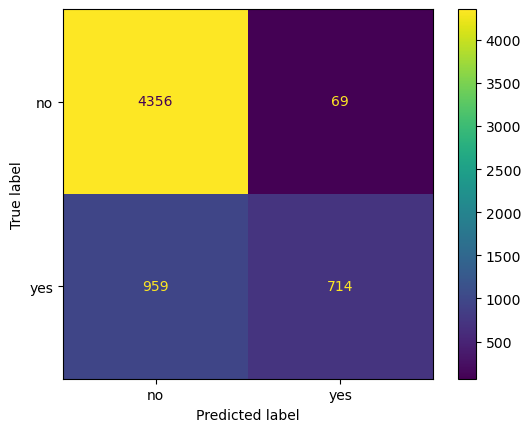

Accuracy = 83.142%


In [187]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(decision_prediction, y_test, ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, decision_prediction)*100,3)) + "%")

Menampilkan beberapa fitur penting menggunakan model decision tree

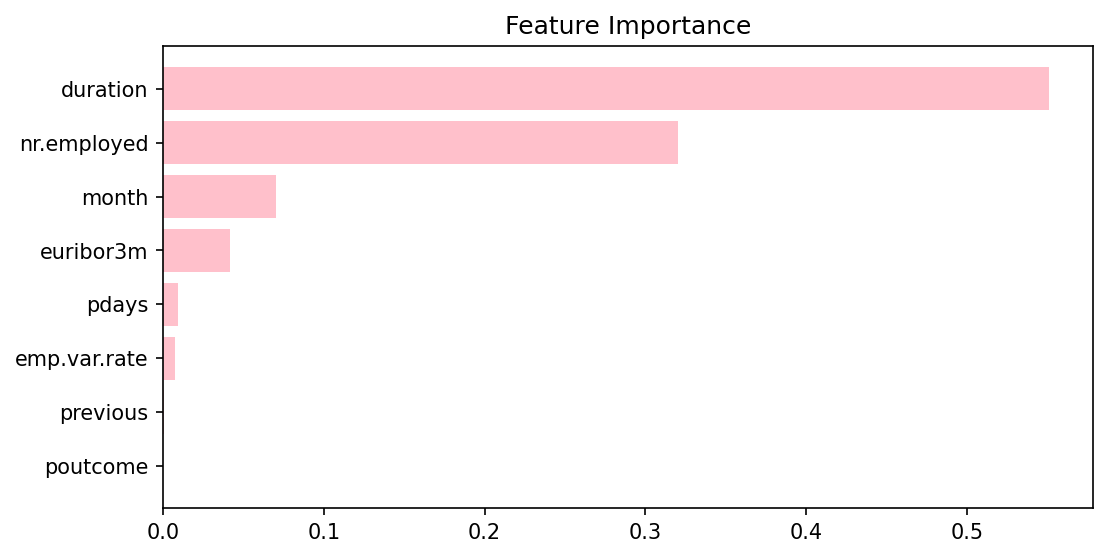

In [188]:
decision_feature = pd.DataFrame(
    data=decision_model.feature_importances_, index=X.columns, 
    columns=["Feature Importance"]
).sort_values("Feature Importance", ascending=True)


fig = plt.figure(figsize=(8,4),dpi=150)
plt.barh(decision_feature.index,decision_feature["Feature Importance"],color="pink")
plt.title("Feature Importance")
plt.show()

Membuat final model Decision Tree menggunakan seluruh dataset

In [189]:
final_dt_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=8)
final_dt_model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=8)

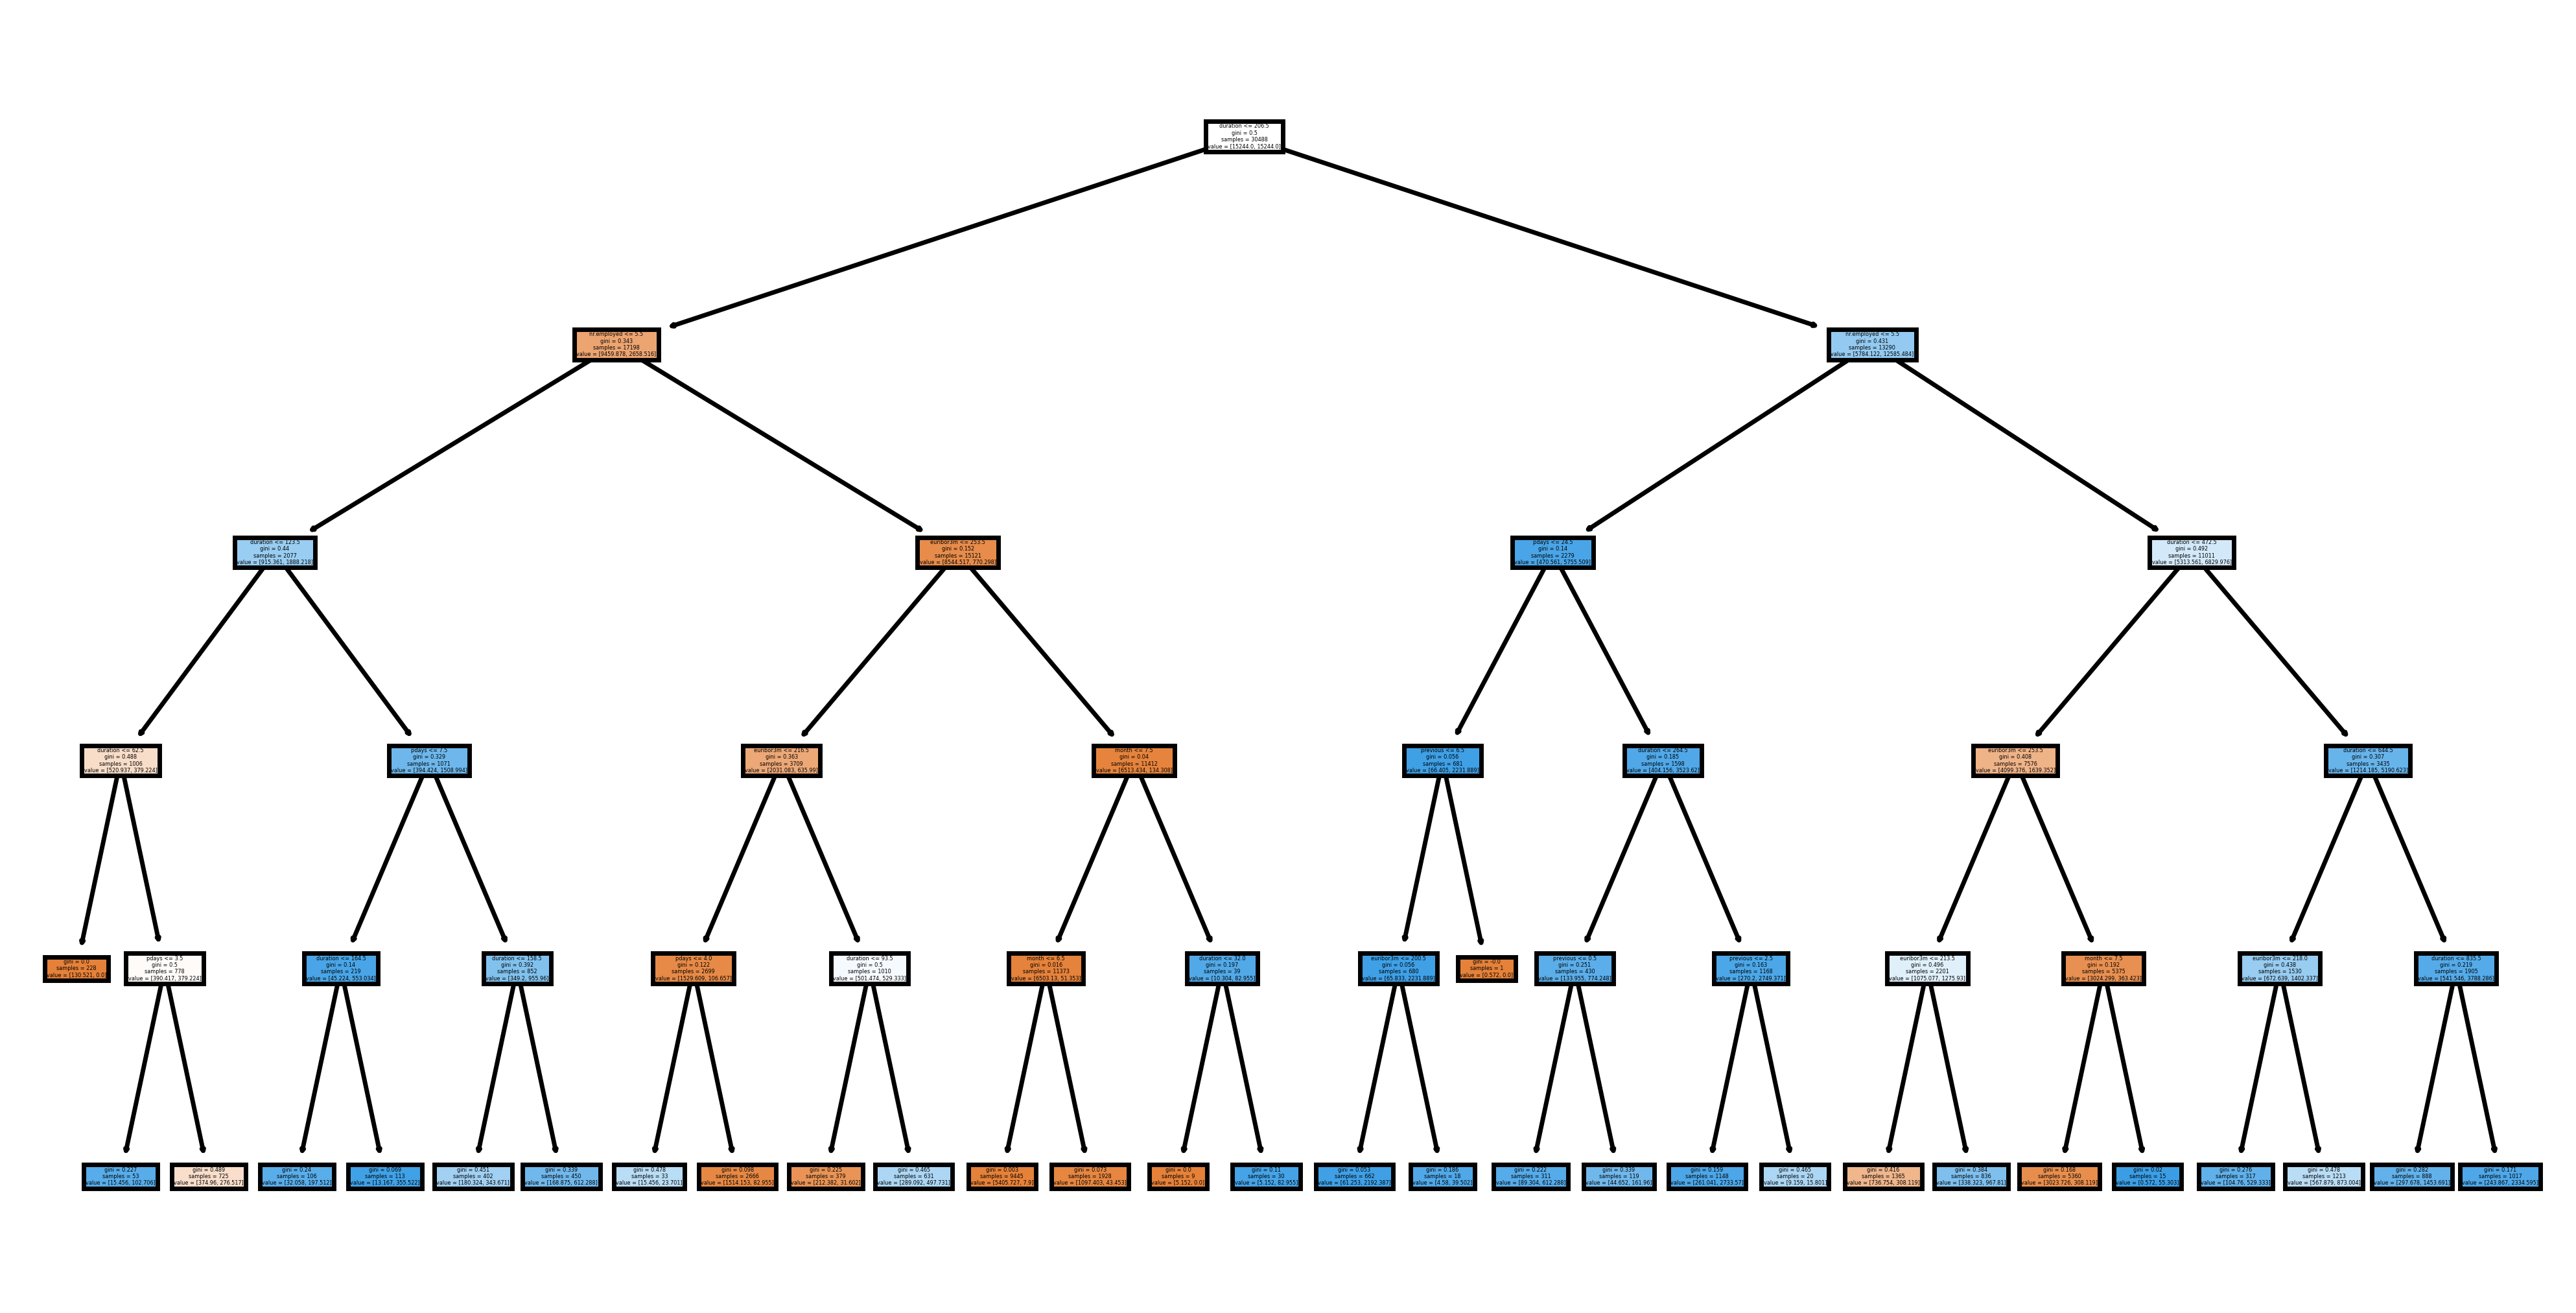

In [190]:
plt.figure(figsize=(10,5),dpi=500)
plot_tree(final_dt_model, filled=True, feature_names=X.columns)
plt.show()

## **Random Forest**

Menghitung dan memvisualisasikan tingkat kesalahan untuk 25 jumlah trees

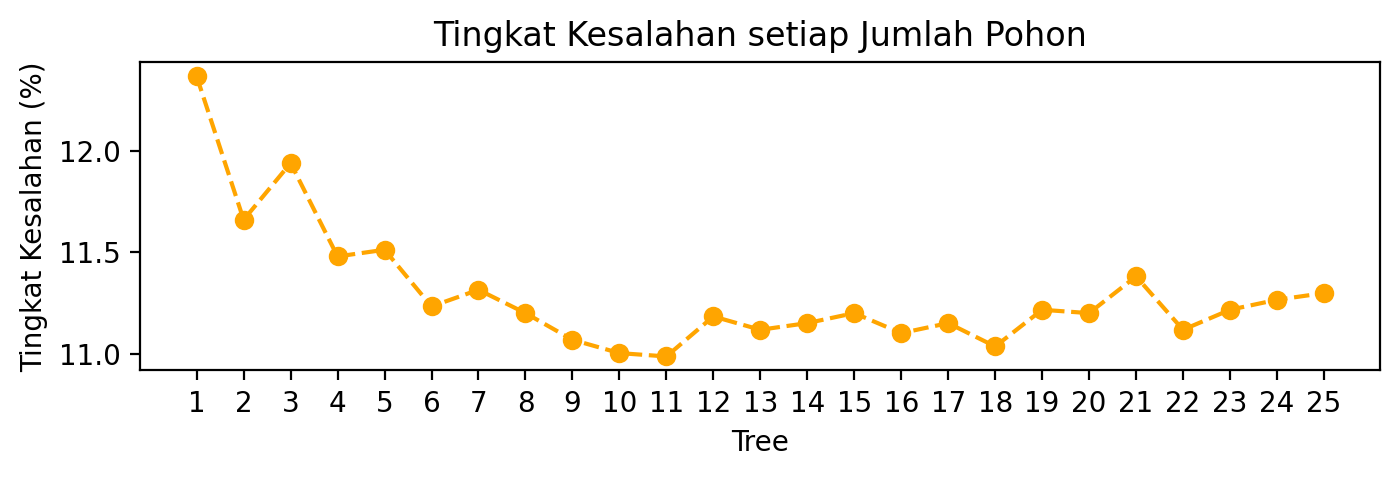

In [191]:
errors = []
for _ in range(1,26):
    temp_model = RandomForestClassifier(n_estimators=_, class_weight="balanced", random_state=8)
    temp_model.fit(scaled_X_train,y_train)
    temp_pred = temp_model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,temp_pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="orange",marker="o",ls="--")
plt.title("Tingkat Kesalahan setiap Jumlah Pohon")
plt.xlabel("Tree")
plt.xticks(range(1,26))
plt.ylabel("Tingkat Kesalahan (%)")
plt.show()

Membuat dan melatih model random forest dengan 6 trees

In [192]:
random_model = RandomForestClassifier(n_estimators=6, class_weight="balanced", random_state=8)
random_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

Menggunakan uji random forest untuk memprediksi data testing

In [193]:
random_prediction = random_model.predict(scaled_X_test)

Evaluasi model random forest

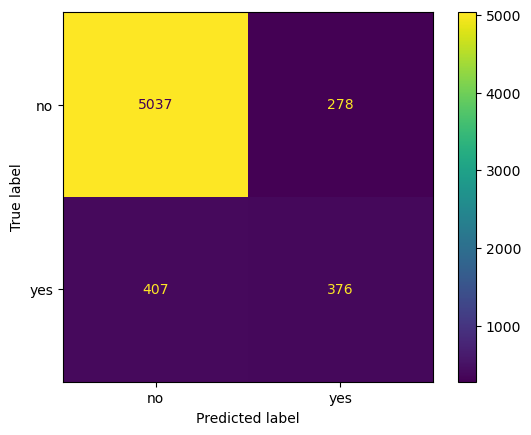

Accuracy = 88.767%


In [194]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,random_prediction,ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, random_prediction)*100,3)) + "%")


Menampilkan beberapa fitur penting menggunakan model random forest

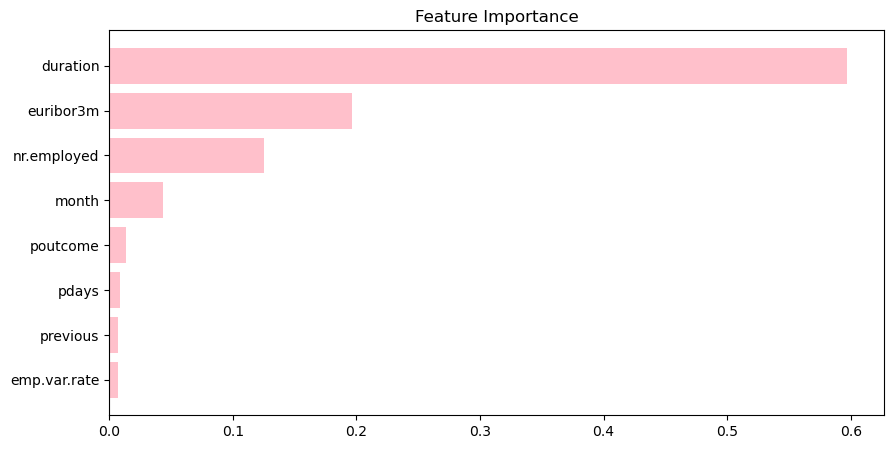

In [195]:
random_feature = pd.DataFrame(
    data=random_model.feature_importances_, index=X.columns, 
    columns=["Feature Importance"]
).sort_values("Feature Importance", ascending=True)

fig = plt.figure(figsize=(10,5),dpi=100)
plt.barh(random_feature.index,random_feature["Feature Importance"],color="pink")
plt.title("Feature Importance")
plt.show()


Membuat final model Random Forest

In [196]:
final_random_model = RandomForestClassifier(n_estimators=6, class_weight="balanced", random_state=8)
final_random_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

## **Naive Bayes**

Membuat dan gunakan Naive Bayes Model dengan Uji Bernoulli

In [197]:
naive_model = BernoulliNB()
naive_model.fit(scaled_X_train,y_train)

BernoulliNB()

Prediksi nilai menggunakan Naive Bayes Model

In [198]:
naive_prediction = naive_model.predict(scaled_X_test)

Evaluasi model Naive Bayes

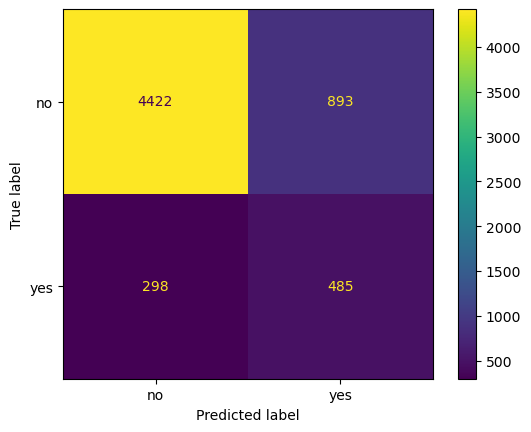

Accuracy = 80.469%


In [199]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test, naive_prediction, ax=plt.gca())
plt.grid(False)
plt.show()

print("Accuracy = " + str(np.round(accuracy_score(y_test, naive_prediction)*100,3)) + "%")

Membuat final model Naive Bayes

In [200]:
final_naive_model = BernoulliNB()
final_naive_model.fit(X,y)

BernoulliNB()

## Conclusion

Nilai akurasi dari seluruh model

In [201]:
print("Accuracy Score for All Model")
print(f"Logistic Regression\t: {np.round(accuracy_score(y_test,reglog_prediction)*100,3)}%")
print(f"K-Nearest Neighbors\t: {np.round(accuracy_score(y_test,knearest_prediction)*100,3)}%")
print(f"Support Vector Machine\t: {np.round(accuracy_score(y_test,svm_prediction)*100,3)}%")
print(f"Decision Tree\t\t: {np.round(accuracy_score(y_test,decision_prediction)*100,3)}%")
print(f"Random Forest\t\t: {np.round(accuracy_score(y_test,random_prediction)*100,3)}%")
print(f"Naive Bayes\t\t: {np.round(accuracy_score(y_test,naive_prediction)*100,3)}%")


Accuracy Score for All Model
Logistic Regression	: 83.962%
K-Nearest Neighbors	: 88.816%
Support Vector Machine	: 82.65%
Decision Tree		: 83.142%


Random Forest		: 88.767%
Naive Bayes		: 80.469%


**Kesimpulan**: Berdasarkan analisis di atas, diketahui bahwa model K-Nearest Neighbors dan model Random Forest memiliki skor akurasi yang lebih tinggi daripada model lainnya yaitu mendekati 90%. Namun, prediksi dari kedua model tersebut tidak akurat dan tidak seimbang, sehingga tidak disarankan untuk digunakan. 

In [202]:
x = ["Naive Bayes","Decision Tree","Support Vector Machine","Logistic Regression"]
y = [np.round(accuracy_score(y_test,naive_prediction)*100,3),np.round(accuracy_score(y_test,decision_prediction)*100,3),
     np.round(accuracy_score(y_test,svm_prediction)*100,3),np.round(accuracy_score(y_test,reglog_prediction)*100,3)]


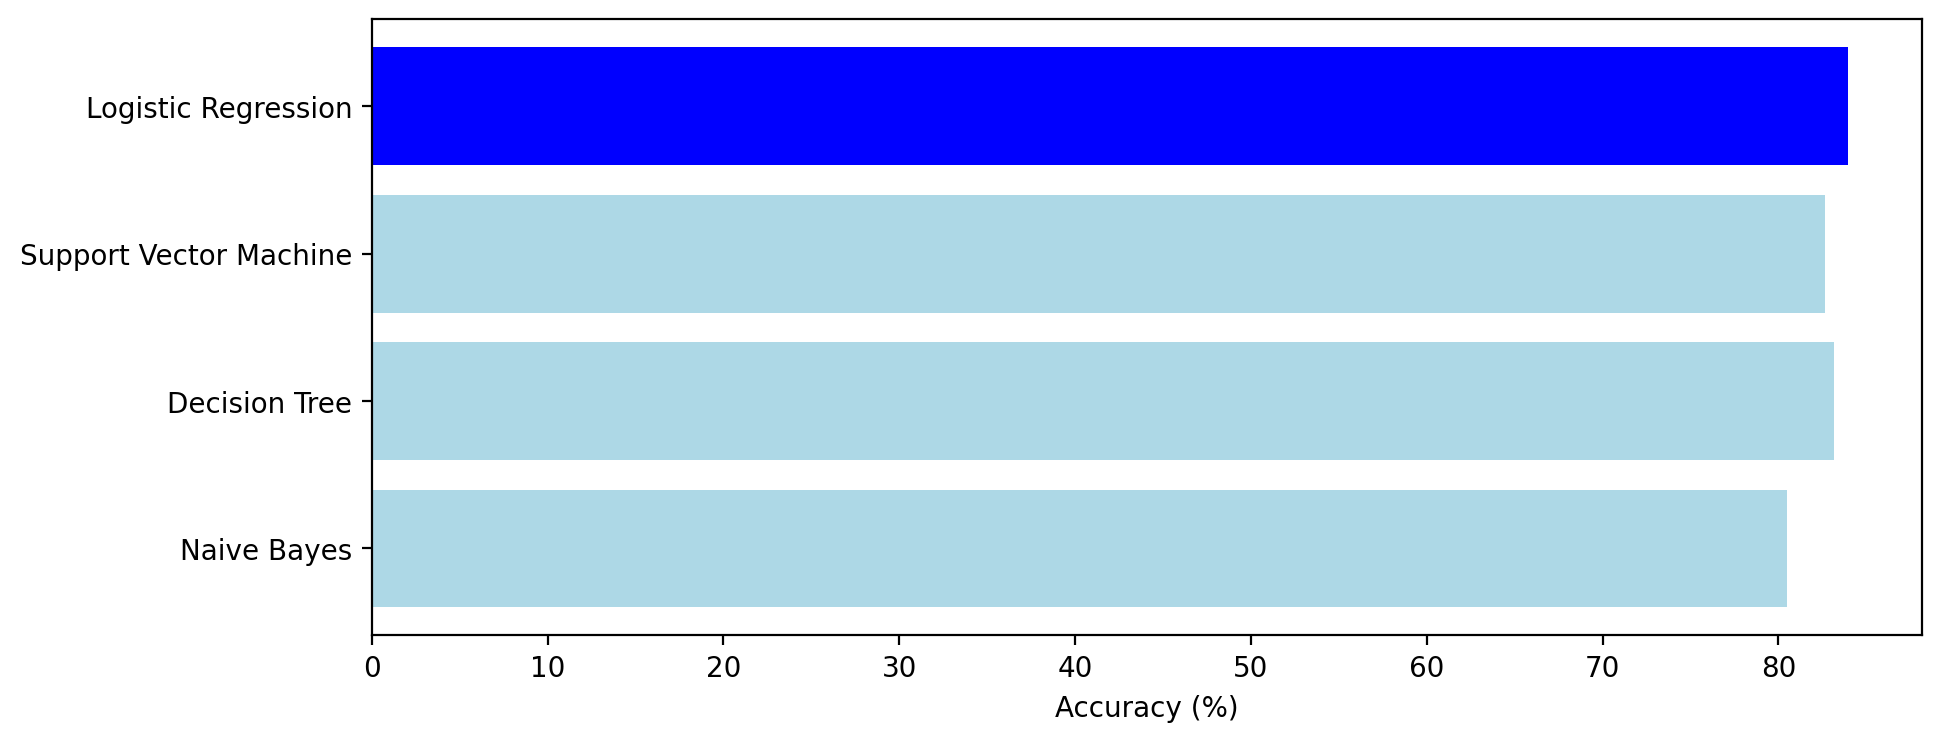

In [203]:
color = []
for _ in np.array(y):
    if _ == np.max(np.array(y)):
         color.append("blue")
    else:
        color.append("lightblue")
        
plt.figure(figsize=(10,4),dpi=200)
plt.barh(x,y,color=color)
plt.xlabel("Accuracy (%)")
plt.show()

Untuk model yang tersisa, model Regresi Logistik memiliki skor akurasi tertinggi sekitar 84%, maka dapat disimpulkan model terbaik yang dapat digunakan dalam kasus ini adalah model **Regresi Logistik**.

Membandingkan antara nilai aktual dengan nilai prediksi dari masing-masing model

In [204]:
pd.DataFrame({
    "actual":y_test,
    "logistic_regression":reglog_prediction,
    "support_vector_machine":svm_prediction,
    "decision_tree":decision_prediction,
    "random_forest":random_prediction
}).reset_index(drop=True)

,actual,logistic_regression,support_vector_machine,decision_tree,random_forest
0,no,no,no,no,no
1,no,no,no,no,no
2,no,no,no,no,no
3,no,no,yes,yes,no
4,no,yes,yes,yes,yes
...,...,...,...,...,...
6093,no,no,no,no,no
6094,no,no,no,no,no
6095,no,no,no,no,no
6096,no,no,no,no,no


Download seluruh final model agar dapat digunakan di kemudian hari

In [205]:
num = 0
for m,n in zip(
    ["Naive Bayes.joblib","Decision Tree.joblib","Support Vector Machine.joblib","Logistic Regression.joblib"],
    [naive_model,decision_model,svm_model,reglog_model]
):
    dump(n,m)
    num += 1
    
if num == 4:
    print("All models have been downloaded")

All models have been downloaded
